1919年,一艘超级巨轮从英国启航,作为当年最奢华巨大的游轮,号称'永不沉没',这是她第一次航行.
与此同时,格陵兰冰原上掉下的冰块,直奔大西洋航线.它将在两天后一个风平浪静的夜晚,见证“永不沉没”的泰坦尼克号撞上冰山,导致''永不沉没''号巨轮,在凌晨2点20分沉没在大西洋深海之中.
船上共2207名乘客和船员,超过1500人遇难.以下是事故调查数据的一部分,包含891名乘客和相关信息.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
path = '/Users/zz/Desktop/train.csv'

In [2]:
titannic = pd.read_csv(path)
titannic.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titannic = titannic[['PassengerId','Survived','Pclass','Name','Sex','Age','Fare']]
titannic = titannic.set_index('PassengerId')
titannic.head()

,Survived,Pclass,Name,Sex,Age,Fare
PassengerId,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833
3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000
5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500


In [5]:
'''
取出不同性别乘客人数
'''
males = titannic[titannic['Sex']=='male']
females = titannic[titannic['Sex']=='female']
passengers = titannic.Name.count()
males_a = males['Survived'].count()
females_a = females['Survived'].count()



print('男士%d位' % males_a)
print('女士%d位' % females_a)
print('共%d位乘客' % passengers)

男士577位
女士314位
共891位乘客


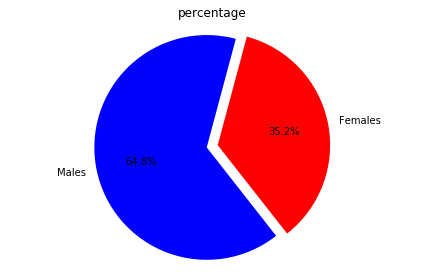

In [7]:
'''
乘客占比
'''
plt.pie(
    [males_a, females_a],
    labels = ['Males', 'Females'],
    colors = ['blue', 'red'],
    startangle =75,
    autopct = '%1.1f%%',
    explode = (0.1, 0)
)
plt.axis('equal')  # 正圆
plt.title('percentage')
plt.tight_layout()
plt.show()

In [10]:
'''
男女分别存活概率
'''
a = titannic.Survived.sum()
m = males.Survived.sum()
f = females.Survived.sum()
print('存活人数为:%d, \n男士:%d, 女士:%d' % (a,m,f))

child = titannic[titannic['Age'] <= 14]  # 将14岁以内乘客视为儿童
child_a = child.Name.count()
child_s = child.Survived.sum()
child_l = child_a - child_s

存活人数为:342, 
男士:109, 女士:233


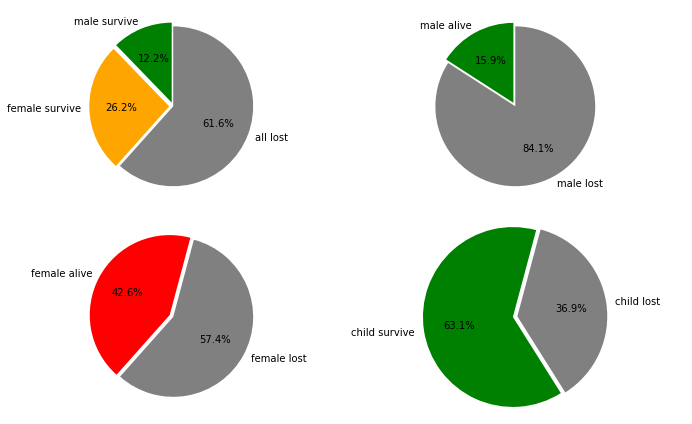

In [11]:
'''
幸存乘客占比,男性到男性占比,女性到女性占比
'''
fig, axes = plt.subplots(2, 2, figsize=(10,6))

axes[0,0].pie(
    [m, f, passengers - m - f],
    labels = ['male survive', 'female survive', 'all lost'],
    colors = ['green', 'orange', 'grey'],
    startangle = 90,
    autopct = '%1.1f%%',
    explode = (0.05, 0.05, 0)
)

axes[0,1].pie(
    [m, males_a],
    labels = ['male alive', 'male lost'],
    colors = ['green', 'grey'],
    startangle = 90,
    autopct = '%1.1f%%',
    explode = (0.05, 0)
)

axes[1,0].pie(
    [f, females_a],
    labels = ['female alive', 'female lost'],
    colors = ['red', 'grey'],
    startangle = 75,
    autopct = '%1.1f%%',
    explode = (0.05, 0)
)

axes[1,1].pie(
    [child_a, child_s],
    labels = ['child survive', 'child lost'],
    colors = ['green', 'grey'],
    startangle =75,
    autopct = '%1.1f%%',
    explode = (0.05, 0)
)
plt.tight_layout()
plt.axis('equal')
plt.show()

船长下令女人孩子先走,直接导致幸存乘客中女性幸存者占多数,孩子幸存最多.即使这样,仍有三分之一孩子遇难.
接下来看看孩子的幸存情况

In [12]:

pclass = titannic.groupby('Pclass').Survived.count()
pclass_s = titannic.groupby('Pclass').Survived.sum()
pclass

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

In [13]:
pclass_s

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [14]:
'''
仓位分三个等级,分别是1,2,3等仓.取出不同仓等下儿童乘客数量
'''
pclass_child = child.groupby('Pclass').Survived.count()
pclass_child

Pclass
1     5
2    19
3    53
Name: Survived, dtype: int64

In [15]:
pclass_child_s = child.groupby('Pclass').Survived.sum()
pclass_child_s

Pclass
1     4
2    19
3    22
Name: Survived, dtype: int64

In [16]:
pclass_child_p = pclass_child_s / pclass_child
p = pclass_child_p
p

Pclass
1    0.800000
2    1.000000
3    0.415094
Name: Survived, dtype: float64

In [18]:
print(f'头等舱儿童幸存概率{p[1]*100}% \n二等仓儿童幸存概率{p[2]*100}%\n三等仓儿童幸存概率{round(p[3]*100,2)}%' )

头等舱儿童幸存概率80.0% 
二等仓儿童幸存概率100.0%
三等仓儿童幸存概率41.51%


In [19]:
'''
生命可以用钱衡量吗?
'''
soul = titannic.groupby('Pclass').Fare.mean()  # 平均仓位票价
soul

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [20]:
soul_price = soul[2] - soul[3]
soul_price

6.986633050340913

二等舱儿童生存概率100%,三等舱只有41.5%.
在1919年泰坦尼克号游轮上,那些未能幸存的三等舱孩子来说,他们的生命价值是6.99美元.

以上数据充分说明:灾难面前生命并不平等,控诉着资本主义的罪恶.